<a href="https://colab.research.google.com/github/evcereti/Aprendiendo_ML_y_DS/blob/main/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-means clustering en el plano cartesiano

El objetivo de este primer notebook será utilizar K means para separar el plano cartesiano en K regiones.

##Primera aproximación al modelo. Firma de la función k-means

Empezamos por definir la firma de nuestra función kmeans que contenga la logica de nuestro algoritmo.

Una primera aproximación al programa a desarrollar sería definir una función kmeans que tome un numero entero k y regrese K números reales que representarán los centroides de cada nueva región en el mapa.

```
def kmeans(k: int) -> List[int]: pass
```

## Primera aproximación a los datos

Las regiones por generar en el mapa no son aleatorias, mas bien, se escogeran según "la población" de puntos que recibiremos como entrada. Esto es analogo a escoger la frontera de paises en el globo basado en la cantidad de población de cada lugar.

Dado que los datos de entrada deben tener cierta distribución que refleje las regiones que queremos generar, es útil importar una librería que genere dicha distribución.

Escogemos make_blobs() de scikit-learn.

In [42]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, centers=4, n_features=2, random_state=7)

In [43]:
X.shape

(200, 2)

In [41]:
y

array([1, 1, 2, 0, 1, 2, 3, 1, 3, 1, 2, 1, 2, 3, 3, 0, 2, 1, 0, 3, 0, 3,
       2, 3, 3, 1, 2, 2, 2, 2, 2, 0, 3, 0, 1, 0, 2, 0, 2, 0, 3, 3, 3, 3,
       1, 2, 0, 1, 1, 3, 1, 2, 2, 0, 1, 0, 3, 0, 3, 0, 1, 2, 2, 0, 1, 2,
       1, 0, 1, 0, 3, 0, 3, 0, 2, 1, 2, 2, 0, 2, 3, 1, 0, 2, 0, 3, 2, 3,
       0, 3, 2, 1, 2, 2, 2, 0, 0, 1, 3, 1, 3, 3, 1, 0, 3, 0, 1, 1, 2, 2,
       0, 0, 1, 1, 3, 1, 3, 0, 0, 3, 1, 3, 0, 0, 2, 2, 3, 0, 3, 3, 2, 1,
       0, 0, 3, 0, 2, 2, 1, 1, 2, 1, 3, 0, 3, 2, 2, 1, 2, 0, 0, 3, 2, 0,
       1, 3, 2, 1, 1, 2, 3, 3, 3, 1, 0, 1, 2, 3, 1, 2, 0, 1, 3, 1, 1, 3,
       2, 0, 0, 1, 1, 0, 1, 2, 3, 0, 3, 0, 2, 3, 2, 3, 3, 0, 0, 1, 1, 1,
       3, 2])

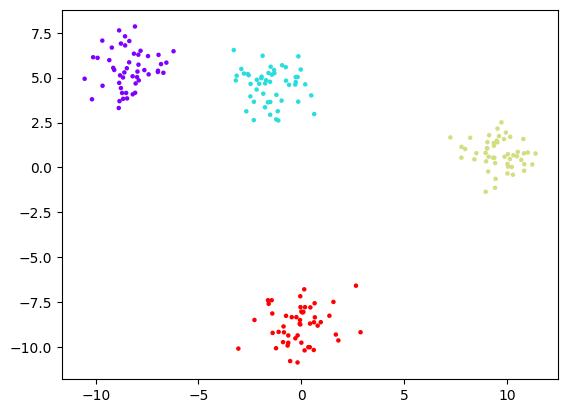

In [36]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, s=5, cmap='rainbow')

## Segunda aproximacion al modelo

Como primera mejora a nuestro modelo podemos añadir la matriz X a nuestra función.


```
def kmeans(k: int, X: List[int]) -> List[int]: pass
```

Es una característica de los algoritmos de K Means que el número K es una de las entradas, no de las salidas de la función.

## Tercera aproximación al modelo. La clase KMeans

Dado que en ML es típico diseñar el modelo de solucion en la forma

```
model = model()
model.fit()
```

como tercera aproximación se propone la siguiente modificación

```
class KMeans:
  def __init__(self, k: int, X: List[int]) -> None:
    self.k = k
    self.X = X

  def fit(self) -> KMeans:
    return self
```

En este punto, aun no definimos como calcular la posición de los centroides.